# Ciência de Dados

## Importação dos arquivos

Inicialmente os arquivos disponibilizados foram importados, e preprocessados com objetivo de substituição das células vazias, que causam problemas aos modelos. Os campos do tipo String foram substituidos por "Not Informed" e os numéricos por -1.Conforme o código a seguir: 

In [5]:
import pandas as pd

credito = pd.read_csv('dataset.csv')

credito["Gender"].fillna("NotInformed", inplace = True)
credito["Married"].fillna("NotInformed", inplace = True)
credito["Dependents"].fillna("NotInformed", inplace = True)
credito["Education"].fillna("NotInformed", inplace = True)
credito["Education"].fillna("NotInformed", inplace = True)
credito["Self_Employed"].fillna("NotInformed", inplace = True)
credito["Property_Area"].fillna("NotInformed", inplace = True)
credito["Credit_History"].fillna(-1, inplace = True)
credito["ApplicantIncome"].fillna(-1, inplace = True)
credito["CoapplicantIncome"].fillna(-1, inplace = True)
credito["LoanAmount"].fillna(-1, inplace = True)
credito["Loan_Amount_Term"].fillna(-1, inplace = True)

## Preprocessamento

Foram delimitados os atributos necessários para a previsão, onde o campo Loan_Id foi retirado já que é apenas um atributo identificador não relevante para a classificação Foi apontada a classe objetivo (Loan_Status) e utilizando a biblioteca Sklearn LabelEncoder foi realizada a transformação dos atributos textuais para numericos para a utilização dos modelos.

In [6]:
previsores = credito.iloc[:,1:12].values
classe = credito.iloc[:,12].values

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() 

previsores[:,0] = labelencoder.fit_transform(previsores[:,0]) 
previsores[:,1] = labelencoder.fit_transform(previsores[:,1]) 
previsores[:,2] = labelencoder.fit_transform(previsores[:,2]) 
previsores[:,3] = labelencoder.fit_transform(previsores[:,3]) 
previsores[:,4] = labelencoder.fit_transform(previsores[:,4]) 
previsores[:,8] = labelencoder.fit_transform(previsores[:,8]) 
previsores[:,9] = labelencoder.fit_transform(previsores[:,9]) 
previsores[:,10] = labelencoder.fit_transform(previsores[:,10]) 

classe = labelencoder.fit_transform(classe)

Para a separação de dados para a criação e validação dos modelos foi utilizada a biblioteca do sklearn, train_test_split utilizou-se uma taxa de 30% dos dados para validação com seleção aleatória. En seguida o atributo LoanAmount foi retirado da amostra de treinamento eseparado como um atributo a ser encontrado (amount_trenamento, amount_teste).

In [7]:

from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe, 
                                                                  test_size = 0.3,
                                                                  random_state = 0)
amount_treinamento = X_treinamento[:,[7]]
amount_teste = X_teste[:,[7]]

X_treinamento = X_treinamento[:,[0,1,2,3,4,5,6,8,9,10]]
X_teste = X_teste[:,[0,1,2,3,4,5,6,8,9,10]]


## Classificação pagamento ou não pagamento da dívida

Para a criação do modelo de previsão de pagamento ou não da dívida foi comparado 3 algoritmos (Naive Bayes, SVM - Suport Verctor Machine e Randon Forest) como mostra o código a seguir

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


###############################################################################
#                                Naive Bayes
###############################################################################
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

previsoes = naive_bayes.predict(X_teste)

confusao = confusion_matrix(y_teste, previsoes)

taxaacerto = accuracy_score(y_teste, previsoes)
###############################################################################
#                                SVM
###############################################################################
svm = SVC()
svm.fit(X_treinamento, y_treinamento)
previsoes2 = svm.predict(X_teste)
confusao2 = confusion_matrix(y_teste, previsoes2)
taxa_acerto2 = accuracy_score(y_teste, previsoes)

###############################################################################
#                                Random Forest
###############################################################################

floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)


previsoes4 = floresta.predict(X_teste)

matriz4 = confusion_matrix(y_teste, previsoes4)
taxa_acerto4 = accuracy_score(y_teste, previsoes4)



C:\Users\aron\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
confusao

array([[  6,  45],
       [ 14, 120]], dtype=int64)

In [12]:
taxaacerto

0.6810810810810811

In [13]:
confusao2

array([[  4,  47],
       [  1, 133]], dtype=int64)

In [14]:
taxa_acerto2

0.6810810810810811

In [15]:
matriz4

array([[ 26,  25],
       [ 13, 121]], dtype=int64)

In [16]:
taxa_acerto4

0.7945945945945946

Dessa forma pode-se observar que o algoritmo RandomForest apresentou um melhor performance, como objetivo de melhorar esta, foi utilizado a biblioteca ExtraTreesclassifier para identificação de importâncias de cada feature na classificação. Indentificou-se que a caracteristicas Gender: gênero, Married: casado ou não casado, Education: grau de escolaridade Self_Employed: se a pessoa é autônoma possuem menor influência na classificação.

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators = 100)
forest.fit(X_treinamento,y_treinamento)

importancias = forest.feature_importances_

In [19]:
importancias

array([0.04348321, 0.02435783, 0.08234264, 0.02293978, 0.045099  ,
       0.26132929, 0.15416317, 0.05140683, 0.25166989, 0.06320837])

Removendo as caracteristicas de menor influência na tentativa de melhores resultados, obteve-se taxa de acerto de 80%:

In [20]:
X_treinamento2 = X_treinamento [:,[2,5,6,7,8,9]]
X_teste2 = X_teste[:,[2,5,6,7,8,9]]

floresta2 = RandomForestClassifier(n_estimators = 100)
floresta2.fit(X_treinamento2, y_treinamento)

# Previsões
previsoes5 = floresta2.predict(X_teste2)

matriz5 = confusion_matrix(y_teste, previsoes5)
taxa_acerto5 = accuracy_score(y_teste, previsoes5)

In [21]:
matriz5

array([[ 30,  21],
       [ 16, 118]], dtype=int64)

In [22]:
taxa_acerto5

0.8

## Quatidade de empréstimo

Para determinação de quanto emprestar ao cliente, foi utilizada uma Multilayer Perceptron como regressor ou aproximador de funções. Como mostra o algoritmo abaixo:

In [23]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt


clf = MLPRegressor(alpha=0.1, hidden_layer_sizes = (30,), max_iter = 50000, 
                 activation = 'relu', verbose = 'True', learning_rate = 'adaptive')
clf.fit(X_treinamento, amount_treinamento)

pred_y = clf.predict(X_teste)

Iteration 1, loss = 37518.03047936
Iteration 2, loss = 14484.02722577
Iteration 3, loss = 7230.18905849
Iteration 4, loss = 7060.96688060
Iteration 5, loss = 8304.57075488
Iteration 6, loss = 8041.39951544
Iteration 7, loss = 7194.65688460
Iteration 8, loss = 6354.55327986
Iteration 9, loss = 5784.51850279
Iteration 10, loss = 4972.07947537
Iteration 11, loss = 4231.18926994
Iteration 12, loss = 4173.52018798
Iteration 13, loss = 4643.43573795
Iteration 14, loss = 4800.14049842
Iteration 15, loss = 4434.89766325
Iteration 16, loss = 3985.68409823
Iteration 17, loss = 4171.85753081
Iteration 18, loss = 4408.64265253
Iteration 19, loss = 4173.87437092
Iteration 20, loss = 3749.19967897
Iteration 21, loss = 3749.39583748
Iteration 22, loss = 3821.38679588
Iteration 23, loss = 3735.01760825
Iteration 24, loss = 3698.20585445
Iteration 25, loss = 3687.37872404
Iteration 26, loss = 3644.97089784
Iteration 27, loss = 3624.03234708
Iteration 28, loss = 3587.45446561
Iteration 29, loss = 3488.6

C:\Users\aron\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Dessa forma temos os valores previstos em vermelho e os reais em azul, na imagem a seguir:

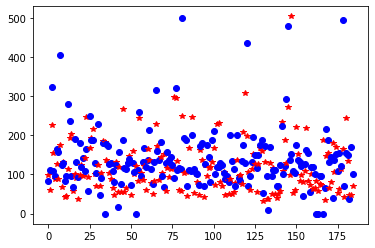

In [24]:
t = len(pred_y)
for i in range(t):
    plt.plot(i,pred_y[i,],'r*-',i, amount_teste[i,],'bo-')

Para os 20 primeiros pontos temos a imagem a seguir, pode-se observar que apenas para alguns pontos o Regressor consegue aproximar fielmente, isso se dá pela dificuldade de calibrar o modelo para esse tipo de tarefa com precisão, sendo necessário muito tempo para identificar um padrão:

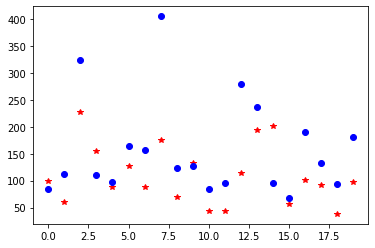

In [25]:
t = 20
for i in range(t):
    plt.plot(i,pred_y[i,],'r*-',i, amount_teste[i,],'bo-')

# Serialização 

Para a serialização dos modelos foi utilizada a biblioteca pickle, dessa forma os modelos validados podem ser consumidos pela API

In [27]:
import pickle
# save the model to disk
filename = 'floresta_credit_model.sav'
pickle.dump(floresta2, open(filename, 'wb'))

filename2 = 'MLPRegressor_credit_model.sav'
pickle.dump(clf, open(filename2, 'wb'))